In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

/Users/Hector/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Exploratory analysis

In [2]:
quants = [i / 10.0 for i in range(10)]

### 1) Donations

In [3]:
donations = pd.read_csv('donations.csv')

How many times does a unique donor made a donation?
There were a total of 1,282,092 donations. The top two donors made 57,093 and 49,985 donations respectively, almost 
10% of the total number of individual donations.

In [4]:
donations_by_donor_id = donations.donor_acctid.value_counts()
donations_by_donor_id.describe()

count    1.282092e+06
mean     2.416355e+00
std      7.898978e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.709300e+04
Name: donor_acctid, dtype: float64

In [5]:
top = 30
perc_top = donations_by_donor_id.head(top).sum() * 100.0 /donations_by_donor_id.sum()
print('Top {0} donors made {1:.0f}% of total donations.'.format(top, perc_top))

Top 30 donors made 10% of total donations.


In [6]:
donations_by_donor = donations.groupby('donor_acctid').sum().donation_total.sort_values(ascending=False)
top10 = donations_by_donor.head(10).sum()
top50 = donations_by_donor.head(50).sum()
sum_of_totaldonations = donations.donation_total.sum()

In [7]:
print('Top 10 donors donated {0:.2f}% of total donations, totaling ${1:.2f} million USD.'.format(top10/sum_of_totaldonations*100, top10/1000000))
print('Top 50 donors donated {0:.2f}% of total donations, totaling ${1:.2f} million USD.'.format(top50/sum_of_totaldonations*100, top50/1000000))
print('Total donations were ${0:.2f} million USD.'.format(sum_of_totaldonations / 1000000))

Top 10 donors donated 12.08% of total donations, totaling $28.70 million USD.
Top 50 donors donated 22.76% of total donations, totaling $54.06 million USD.
Total donations were $237.54 million USD.


#### Number of donations by state

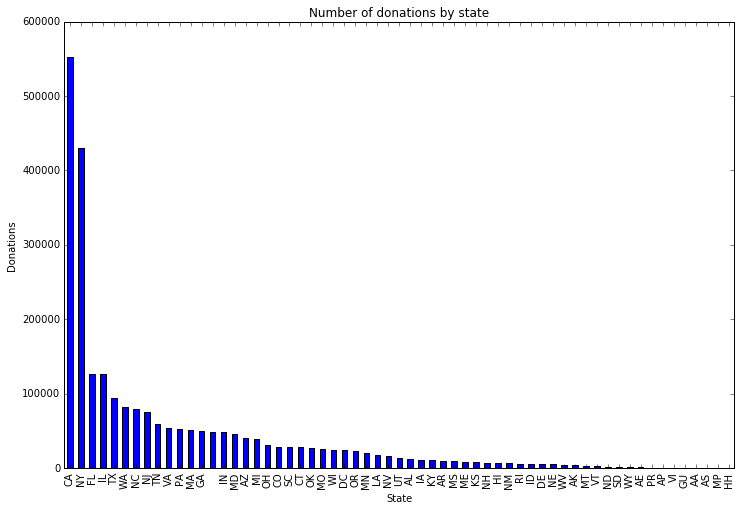

In [8]:
fig = plt.figure(figsize = (12,8))
donations.donor_state.value_counts().plot(kind = 'bar')
plt.title('Number of donations by state') 
plt.xlabel('State')
plt.ylabel('Donations')

#### Total amount of money by state

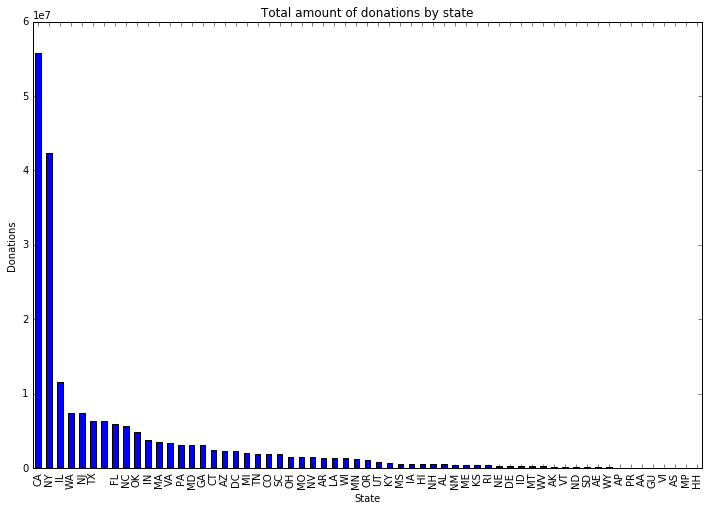

In [9]:
fig = plt.figure(figsize = (12,8))
donations.groupby('donor_state').sum().donation_total.sort_values(ascending = False).plot(kind = 'bar')
plt.title('Total amount of donations by state') 
plt.xlabel('State')
plt.ylabel('Donations')

### 2) Essays submitted

In [10]:
essays =  pd.read_csv('essays.csv')

In [11]:
# How many projects does the teachers created
essays.teacher_acctid.value_counts().describe()

count    249555.000000
mean          2.661129
std           5.432593
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         266.000000
Name: teacher_acctid, dtype: float64

In [12]:
essays.teacher_acctid.value_counts().quantile(quants)

0.0    1.0
0.1    1.0
0.2    1.0
0.3    1.0
0.4    1.0
0.5    1.0
0.6    2.0
0.7    2.0
0.8    3.0
0.9    5.0
Name: teacher_acctid, dtype: float64

Of 249,555 projects, the average teacher created 2 or 3 projects. 50% of the teachers created just one project, while 90% of them created 5 or less. One teacher created 266 projects.

In [13]:
essays['essay_length'] = essays.essay.str.len()

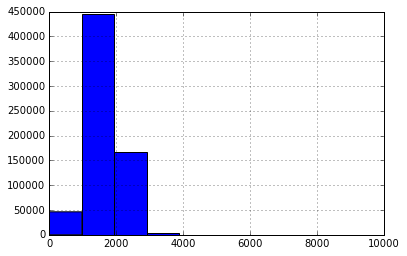

In [14]:
essays.essay_length.hist()

### 3) Outcomes

In [15]:
outcomes = pd.read_csv('outcomes.csv')

In [16]:
# There are several columns with many null values
for column in outcomes.columns:
    if len(outcomes[column].isnull().value_counts().keys()) > 1:
        print('{} has {} null values.'.format(column, outcomes[column].isnull().value_counts()[True]))
        
# Assume that if null value, answer is False.
outcomes = outcomes.fillna(value='f')

at_least_1_teacher_referred_donor has 94398 null values.
at_least_1_green_donation has 94398 null values.
three_or_more_non_teacher_referred_donors has 94398 null values.
one_non_teacher_referred_donor_giving_100_plus has 94398 null values.
donation_from_thoughtful_donor has 94398 null values.
great_messages_proportion has 179839 null values.
teacher_referred_count has 94398 null values.
non_teacher_referred_count has 94398 null values.


In [17]:
# Replace true with 1 and false with 0 to work better.
outcomes = outcomes.replace(to_replace='t', value=1)
outcomes = outcomes.replace(to_replace='f', value=0)

Of the total number of projects, 36,710 were considered "exciting" ones. 

In [18]:
outcomes.is_exciting.value_counts()

0    582616
1     36710
Name: is_exciting, dtype: int64

In [19]:
check_labels = outcomes.columns[1:8] + outcomes.columns[10:11]

for column in check_labels:
    print('{} projects: {}.'.format(outcomes[column].value_counts()[1], column))

378693 projects: at_least_1_green_donation.
124660 projects: at_least_1_teacher_referred_donor.
430683 projects: fully_funded.
187170 projects: great_chat.
36710 projects: is_exciting.
377809 projects: one_non_teacher_referred_donor_giving_100_plus.
41293 projects: teacher_referred_count.
272378 projects: three_or_more_non_teacher_referred_donors.


/Users/Hector/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  if __name__ == '__main__':


In [20]:
outcomes[outcomes['is_exciting'] == 1].sum()

projectid                                         ffff2d9c769c8fb5335e949c615425ebfffe0bb8af3b9c...
is_exciting                                                                                   36710
at_least_1_teacher_referred_donor                                                             36710
fully_funded                                                                                  36710
at_least_1_green_donation                                                                     36710
great_chat                                                                                    36710
three_or_more_non_teacher_referred_donors                                                     31660
one_non_teacher_referred_donor_giving_100_plus                                                27695
donation_from_thoughtful_donor                                                                 1057
great_messages_proportion                                                               2.86524e+06


In [21]:
# Seems like they do comply with the requirements to be exciting!
outcomes['complies'] = outcomes.three_or_more_non_teacher_referred_donors+outcomes.one_non_teacher_referred_donor_giving_100_plus+outcomes.donation_from_thoughtful_donor
outcomes[outcomes['is_exciting'] == 1].complies.value_counts()

2    22338
1    13690
3      682
Name: complies, dtype: int64

### 4) Projects

In [22]:
projects =  pd.read_csv('projects.csv')

In [23]:
exciting_projects = outcomes[outcomes.is_exciting == 1].merge(projects, on='projectid', how='left')

In [24]:
unique_schools_with_exciting = exciting_projects.schoolid.unique()
unique_cities_with_exciting = exciting_projects.school_city.unique()
unique_states_with_exciting = exciting_projects.school_state.unique()
city_most_exciting = exciting_projects.school_city.value_counts().head(1)

print('There are {} unique schools with exciting projects.'.format(len(unique_schools_with_exciting)))
print('These are located in {} cities accross {} states (and territories).'.format(len(unique_cities_with_exciting), len(unique_states_with_exciting)))
print('The city with the highest number of exciting projects is {} with {} projects.'.format(city_most_exciting.keys()[0], city_most_exciting[0]))

There are 15924 unique schools with exciting projects.
These are located in 3750 cities accross 51 states (and territories).
The city with the highest number of exciting projects is Chicago with 1640 projects.


Selected exciting projects seem to be evenly distributed among schools with different poverty levels. Each poverty bracket had around 5.5% of their projects selected.

In [25]:
exciting_projects.groupby('poverty_level').count().is_exciting / projects.poverty_level.value_counts()

high poverty        0.051734
highest poverty     0.056067
low poverty         0.056669
moderate poverty    0.058481
dtype: float64

In absolute numbers, however, the poverty bracket with the highest number of exciting projects is the highest poverty one.

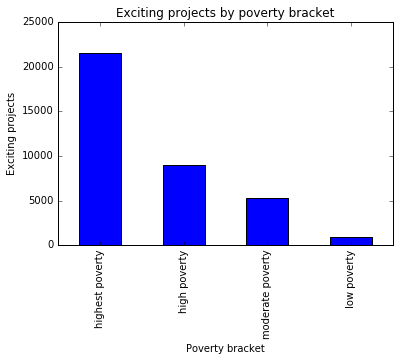

In [26]:
exciting_projects.groupby('poverty_level').count().is_exciting.ix[
    ['highest poverty', 'high poverty', 'moderate poverty', 'low poverty']].plot(kind='bar')
plt.title('Exciting projects by poverty bracket') 
plt.xlabel('Poverty bracket')
plt.ylabel('Exciting projects')

There are several fields with a considerable amount of nulls. Zip code, public national center for education statistics id, cost of fulfillment, and number of students reached are some of these.

In [27]:
projects.describe()

/Users/Hector/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,6.213620e+05,664098.000000,664098.000000,664094.000000,629016.000000,6.640980e+05,6.640980e+05,663952.000000
mean,2.608577e+11,37.240948,-93.344760,52926.452644,27.495822,5.420415e+02,6.447128e+02,97.233547
std,1.589754e+11,4.668155,17.761908,31193.738658,8.663046,1.267738e+04,1.545863e+04,2283.327661
min,1.000050e+10,18.249140,-176.634989,410.000000,9.000000,0.000000e+00,0.000000e+00,0.000000
25%,NaN,34.038082,-112.003213,NaN,NaN,2.672000e+02,3.175000e+02,NaN
50%,NaN,37.662476,-87.681219,NaN,NaN,4.110000e+02,4.878400e+02,NaN
75%,NaN,40.758827,-79.193091,NaN,NaN,5.864900e+02,6.963875e+02,NaN
max,6.100009e+11,67.258157,-66.628036,99950.000000,35.000000,1.025002e+07,1.250002e+07,999999.000000


### 5) Resources

In [28]:
resources =  pd.read_csv('resources.csv')

In [29]:
resources.columns

Index([u'resourceid', u'projectid', u'vendorid', u'vendor_name',
       u'project_resource_type', u'item_name', u'item_number',
       u'item_unit_price', u'item_quantity'],
      dtype='object')

In [30]:
resources['total_cost'] = resources.item_unit_price * resources.item_quantity

In [31]:
print('Some projects requested an extraordinary amount of money.')
top2_by_resources = resources.groupby('projectid').sum().total_cost.sort_values(ascending=False).head(2)
print('The 2 projects requesting the most resources requested a total of ${0:.0f}.'.format(top2_by_resources.sum()))
print('\n')
next_by_resources = resources.groupby('projectid').sum().total_cost.sort_values(ascending=False).head(10)[2:10]
print('The next 8 projects requesting the most resources requested a total of ${0:.0f}.'.format(next_by_resources.sum()))

Some projects requested an extraordinary amount of money.
The 2 projects requesting the most resources requested a total of $458421996.


The next 8 projects requesting the most resources requested a total of $2052667.


In [32]:
avg_project_cost = resources.groupby('projectid').sum().total_cost.mean()
'The average project requests resources with a cost of {}.'.format(avg_project_cost)

'The average project requests resources with a cost of 1140.75303958.'

Most of the requests for resources are to be acquired from the following 10 companies:

In [33]:
resources.vendor_name.value_counts().head(10)

Lakeshore Learning Materials    744371
AKJ Books                       653845
Barnes and Noble                568438
Amazon                          216278
Best Buy for Business           176982
Quill.com                       170423
School Specialty                145543
Blick Art Materials             113962
Nasco                           113226
Teachers' School Supply          84828
Name: vendor_name, dtype: int64

Books and Supplies are the categories with the highest number of resource requests.

In [34]:
print(resources.project_resource_type.value_counts())
books = resources.project_resource_type.value_counts()['Books']
supplies = resources.project_resource_type.value_counts()['Supplies']
all = float(resources.project_resource_type.count())
print('\nBooks and supplies make up {0:.0f}% of the total requests.'.format((books+supplies)/all*100))

Books         1575792
Supplies      1341579
Technology     477598
Other          264644
Trips            6186
Visitors         1222
Name: project_resource_type, dtype: int64

Books and supplies make up 80% of the total requests.


Top vendor varies depending on the type of resource requested:

In [35]:
type_of_resources = resources.project_resource_type.unique()
for resource in type_of_resources:
    print(resource)
    print(resources[resources['project_resource_type'] == resource].vendor_name.value_counts().head(5))
    print('\n')

Technology
Best Buy for Business           159653
Lakeshore Learning Materials     55114
Quill.com                        46384
Amazon                           38109
CDW-G                            36145
Name: vendor_name, dtype: int64


Supplies
Lakeshore Learning Materials    430916
Quill.com                       105861
School Specialty                104535
Blick Art Materials             103490
Nasco                            81536
Name: vendor_name, dtype: int64


Other
Lakeshore Learning Materials     107757
School Specialty                  16644
Amazon                            14827
Nasco                             13205
Kaplan Early Learning Company     13111
Name: vendor_name, dtype: int64


Books
AKJ Books                        617344
Barnes and Noble                 538059
Lakeshore Learning Materials     150498
Amazon                           113775
Kaplan Early Learning Company     20877
Name: vendor_name, dtype: int64


Trips
Barnes and Noble                76
Q

## Data Story

Let's take a look at why is there such an expensive project. Are they looking to build something big? Are they requesting like a lot of computers or electronic equipment?

In [36]:
top_by_resources = resources.groupby('projectid').sum().total_cost.sort_values(ascending=False).head(10)
most_expensive_project = top_by_resources.index[0]

Apparently this project requested only books, but there is one that has an unexpected cost of 450,000,000 USD. There must be something wrong with this book. Most likely, the price got mixed up with the item number (3.99 which sound much more like the price of a book).

In [37]:
res_id = resources[resources.projectid == most_expensive_project].total_cost.sort_values(ascending=False).head(1).keys()[0]
resources.iloc[res_id]

resourceid               3ed3a90cd5059bc8d5365bbd36973257
projectid                cffed1b1f8307ae1b17d95d35029c29e
vendorid                                              NaN
vendor_name                                           NaN
project_resource_type                               Books
item_name                                   Great Gretzky
item_number                                          3.99
item_unit_price                               4.48422e+08
item_quantity                                           1
total_cost                                    4.48422e+08
Name: 682662, dtype: object

What about the second most expensive project?

In [38]:
sec_most_expensive_project = top_by_resources.index[1]

Why is an item called "DC Test Item" so expensive?

In [39]:
resources[resources.projectid == sec_most_expensive_project]

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity,total_cost
1621933,e500bc7ef6492ebbc48153a6b09825d7,8ec6ef94555d01ede69ab3785aba8c40,NaN,NaN,Other,DC Test Item,NaN,10000000.0,1.0,10000000.0


In [40]:
resources[resources.projectid == sec_most_expensive_project].merge(essays, on='projectid')

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity,total_cost,teacher_acctid,title,short_description,need_statement,essay,essay_length
0,e500bc7ef6492ebbc48153a6b09825d7,8ec6ef94555d01ede69ab3785aba8c40,NaN,NaN,Other,DC Test Item,NaN,10000000.0,1.0,10000000.0,8b0c1d11b3d14836db5383d8196e8de7,TEST - PLEASE DO NOT DONATE,NaN,PLEASE IGNORE - This is a test,Please ignore. This is a test. \r\n,34.0


Apparently this is a 'test' entry on the resource table, so not actually a project.

Let's take a look at some of the other most expensive projects.

In [41]:
other_most_expensive_project = top_by_resources.index[2:]
resources[resources.projectid.isin(list(other_most_expensive_project))]

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity,total_cost
510824,8a3877e740692270196891fd8fd7581f,dc106a943920d1fbe1f4f079c212c732,2.0,Kaplan Early Learning Company,Technology,ActivBoard Adjustable & Fixed System Frame,27649,600.00,30.0,18000.00
510825,ab93d94ee4c3d071283d5d0b6f003316,dc106a943920d1fbe1f4f079c212c732,2.0,Kaplan Early Learning Company,Technology,Freight,27660,1431.19,1.0,1431.19
510826,cfee389f0d2b14a2384e2fdedc65abf9,dc106a943920d1fbe1f4f079c212c732,2.0,Kaplan Early Learning Company,Technology,ActivBoard 578Pro Mobile System,27651,3599.00,30.0,107970.00
583968,41f69e5021bbd7d76add67d6f99556ea,d6ef27c07c30c81f0c16c32b6acfa2ff,150.0,CDW-G,Technology,Toshiba Tecra A8-EZ8412,1066435,925.28,420.0,388617.60
636425,db591e00b01469f8b7a8884240ff6137,d3411fe4bd503899bd6ba9e4d88e5fc4,NaN,NaN,Other,12-Gallon Storage Bin,277137,11.55,4.0,46.20
636426,a9d38b837f83920176c68565a0182573,d3411fe4bd503899bd6ba9e4d88e5fc4,NaN,NaN,Other,Economy Adjustable-Shelf Storage Unit,359976,149.85,1.0,149.85
636427,3aa028dc8e17c93dc5110be23f821b9e,d3411fe4bd503899bd6ba9e4d88e5fc4,NaN,NaN,Other,Eldon Fold' N Roll Cart System,$38.59,264275.00,1.0,264275.00
993991,5962232d49c9f01e603a2521cdaafa23,ba33798533580b2d3167c455ba101a63,150.0,CDW-G,Technology,HP Mini 110 1020NR Atom N270 1 6 GHz 10 1 ...,1786620,329.99,250.0,82497.50
1122610,dc75a41344fee7ccba653140bf4272e0,b13aaa06baad031277fdd7c7f7370c02,NaN,NaN,Other,New playground,NaN,93425.78,1.0,93425.78
2357034,656df8f9b913df69c609d6cae49885cf,5b9ec0ec98a6ef660892cca50e3d9f2c,2.0,Kaplan Early Learning Company,Technology,ActivBoard 578Pro Mobile System,27651,3599.00,30.0,107970.00


Apparently there is another book, Little Cloud, which seems to have mixed it's price with the number. This is making this item to cost 904,033 USD. Pretty high for a book. There is also Eldon Fold'N Roll Cart System, for 264,275 USD. This one is definitely swapped, as the item_number even has a '$' sign on it.

There seems to be a relatively frequent issue with the item_unit_price and the item_number, at least in the most expensive projects. Some of these are swapped and that makes prices look terribly high. It would be useful to take a look at some of the item_number, item_unit_price pairs, see if they look like they should be swapped, and fix them. This might be inflating the costs of some of the projects in a very unusual way. As DonorsChoose.org, you wouldn't want to artificially inflate the amounts you're giving away, because you might leave other good projects without any budget.

## Questions for the project partner

Based on their goal, predict "exciting" funding requests, some of the questions I would do are.

- There seems to be a higher number of schools classified as high-poverty to be selected as exciting. Is this because more schools within such category apply to DonorsChoose.org? Or is it because there is a preference to fund such schools?
- California and New York are by far the states with highest number of donations. Any ideas on why this is? Could we somehow market to donors in other states to fund our projects? Because there seems to be an opportunity to expand the donor base in other states.
- Is there a particular preference from the 'Thoughtful Donors' to choose a specific type of project? Do they maintain consistent preferences through the years?
- They want to fund exciting projects, but what about effective projects? Do they have a way to measure which type of materials impact the students the most? Maybe it would be sueful to include this type of variable in the next years.
- Could there be a type of underrepresented projects that should have a priority when assigning resources?

I would also suggest a data validation step. The resources database had a couple of errors in prices that could impact the analysis. 

## Modeling

What about donation_from_thoughtful_donor? We would like to know how likely it is for a random project to be chosen by one of these donors. From the 619,326 projects, only 6,936 (1.12%) got money from these star donors. Getting money from the thoughtful donors is apparently important. It seems they influence others to donate, as 94% of the projects where they donate get fully funded (vs. 70% on average).

In [42]:
outcomes.donation_from_thoughtful_donor.mean(), outcomes.donation_from_thoughtful_donor.sum()

(0.011199271466077639, 6936)

In [43]:
temp = outcomes[outcomes.donation_from_thoughtful_donor == 1].fully_funded
temp.count(), temp.mean(), temp.sum()

(6936, 0.94031141868512114, 6522)

In [44]:
outcomes.fully_funded.mean()

0.69540597359064527

Apparently these are not projects from just one year. They expand accross several years.

We build new variables to determine the year, month, and day.

In [45]:
projects['year'], projects['month'], projects['day'] = zip(*projects.date_posted.str.split('-'))

In [46]:
bigger = outcomes.merge(projects, on='projectid', how='inner')
label = 'is_exciting'

categorical = ['teacher_acctid', 'schoolid', 'school_ncesid','school_city', 'school_state', 'school_zip',
       'school_metro', 'school_district', 'school_county', 'school_charter', 'school_magnet', 'school_year_round',
       'school_nlns', 'school_kipp', 'school_charter_ready_promise', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject', 'primary_focus_area', 'secondary_focus_subject',
        'secondary_focus_area', 'resource_type', 'grade_level',
       'eligible_almost_home_match']
continuous  = ['school_latitude', 'school_longitude', 'fulfillment_labor_materials',
       'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached',
       'year', 'month']
feats = categorical + continuous

In [47]:
bigger = bigger.replace(to_replace='t', value=1)
bigger = bigger.replace(to_replace='f', value=0)

for feat in categorical:
    bigger[feat] = bigger[feat].fillna('')
for feat in continuous:
    bigger[feat] = bigger[feat].fillna(0)

In [48]:
bigger.isnull().any()

projectid                                         False
is_exciting                                       False
at_least_1_teacher_referred_donor                 False
fully_funded                                      False
at_least_1_green_donation                         False
great_chat                                        False
three_or_more_non_teacher_referred_donors         False
one_non_teacher_referred_donor_giving_100_plus    False
donation_from_thoughtful_donor                    False
great_messages_proportion                         False
teacher_referred_count                            False
non_teacher_referred_count                        False
complies                                          False
teacher_acctid                                    False
schoolid                                          False
school_ncesid                                     False
school_latitude                                   False
school_longitude                                

In [49]:
from sklearn.preprocessing import LabelEncoder
def process_categorical_features(df, feat):
    le = LabelEncoder()
    le.fit(df[feat])
    df[feat] = le.transform(df[feat])    

In [50]:
for feat in categorical:
    process_categorical_features(bigger, feat)

In [51]:
test  = bigger[bigger.year == '2013']
train = bigger[bigger.year != '2013']
X_train, Y_train, X_test, Y_test = train[feats], train.donation_from_thoughtful_donor, test[feats], test.donation_from_thoughtful_donor
1 - Y_test.mean()

0.96741009221116436

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import ParameterGrid
from sklearn.cross_validation import KFold

def classify(X_train, Y_train, X_test, Y_test, clfs, iters, verbose = False):
    '''
    Takes:
        - X_train, a dataframe of features 
        - Y_train, a dataframe of the label
        - X_test, a dataframe of features 
        - Y_test, a dataframe of the label
        - clfs, a list of strings indicating classifiers to run (e.g. ['LR', 'DT'])
        - iters, an integer referring to iterations of a model
        - r, a float to determine if a classifier score yields a positive or negative prediction

    Returns:
        scores, a dictionary with parameters as keys and y-scores as values
    '''
    grid = {'LR' : {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 5, 10, 20]}}
    classifiers = { 'LR' : LogisticRegression()}
    scores = {}

    # for every classifier, try any possible combination of parameters on grid
    for index, clf in enumerate([classifiers[x] for x in clfs]):
        name = clfs[index]
        parameter_values = grid[name]
        scores[name] = {}
        i = 0

        for p in ParameterGrid(parameter_values):
            clf.set_params(**p)
            scores[name][str(p)] = []
            kf_train = KFold(len(X_train), n_folds = iters)
            kf_test  = KFold(len(X_test), n_folds = iters)

            for train_index, _ in kf_train: 
                xtrain, ytrain = X_train.iloc[train_index], Y_train.iloc[train_index]
                print(i)
                i += 1

                try:
                    if hasattr(clf, 'predict_proba'):
                        yscores = clf.fit(xtrain,ytrain).predict_proba(X_test)[:,1]
                    else:
                        yscores = clf.fit(xtrain,ytrain).decision_function(X_test)

                    scores[name][str(p)].append(yscores)

                except IndexError:
                    continue

    return scores

In [57]:
scores = classify(X_train, Y_train, X_test, Y_test, ['LR'], 2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [58]:
from sklearn.metrics import accuracy_score

def get_preds(yscores, thresh):
    return [1 if score >= thresh else 0 for score in yscores]

def get_best_model(scores, y):
    max_met = 0
    max_thresh = 0
    best_params = ''
    thresholds = [i / 10.0 for i in range(10)]
    for params, score_array in scores['LR'].items():
        for thresh in thresholds:
            tot_met = []
            metric = []
            for score in score_array:
                yhat = get_preds(score, thresh)
                met_val = accuracy_score(y, yhat)
                metric.append(met_val)
            tot_met = sum(metric)/len(metric)
            if tot_met > max_met:
                max_met = tot_met
                max_thresh = thresh
                best_params = params
    return max_met, max_thresh, best_params


In [60]:
import numpy as np
metric, threshold, parameters = get_best_model(scores, np.array(Y_test))
metric, threshold, parameters

(0.96741009221116436, 0.1, "{'penalty': 'l1', 'C': 10}")

While it is true that accuracy is very high, the problem is that it seems every observation is just being labeled as not receiving a donation from a thoughtful donor. Even using other metrics (e.g. auc-roc, accuracy, recall) is not useful to get a good model, when using only Logistic Regression. It would be useful exploring other models/algorithms to get better predictions. 

There's also the fact that there are a lot of features in the model. It could be better to restrict features to just a few and see how they perform. 